# Data Reduction (archival)

This tutorial will guide you through the process of finding, downloading, and reducing data from the Mikulski Archive for Space Telescopes (MAST) to create science-ready light curves. We'll primarily use the `lightkurve` Python package, a powerful tool for working with space telescope data like TESS, Kepler, and K2.

**Goal:** By the end of this tutorial, you'll be able to search for space telescope data, download it, perform basic reduction steps (like cleaning and normalization), and generate a light curve ready for analysis (e.g., searching for exoplanet transits or stellar variability).

**Environment:** This notebook is designed to work well in online Python IDEs like Google Colab or MS Visual Studio Code with a Python kernel.

## Introduction to MAST and Lightkurve

### What is MAST?
The **Mikulski Archive for Space Telescopes (MAST)** is NASA's primary archive for optical and ultraviolet astronomical data, with a strong focus on exoplanet-finding missions. It hosts data from missions like:
* **TESS (Transiting Exoplanet Survey Satellite):** Currently surveying most of the sky for nearby transiting exoplanets.
* **Kepler/K2:** Famous for discovering thousands of exoplanets using the transit method.
* Hubble Space Telescope (HST), GALEX, and others.

You can explore MAST visually via its portal: [https://mast.stsci.edu](https://mast.stsci.edu)

### What is Lightkurve?
**Lightkurve** is an open-source Python package designed to simplify the analysis of time-series astronomical data, especially from NASA's TESS, Kepler, and K2 missions. It provides tools for searching, downloading, processing, and plotting light curves and target pixel files (TPFs).

Official documentation: [https://docs.lightkurve.org](https://docs.lightkurve.org)

## Setting up Your Python Environment

To use `lightkurve`, you'll need Python and several packages including `astropy`, `numpy`, and `matplotlib`. The easiest way to install `lightkurve` and its dependencies is using `pip`. If you are in an environment like Google Colab, this command will install it into your current session.

```python
!pip install lightkurve
```

Now, let's import `lightkurve` and other useful packages.

In [ ]:
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline;
# This ensures plots appear inline in Jupyter notebooks

c:\Users\satur\anaconda3\Lib\site-packages\lightkurve\prf\__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


## Searching for Data on MAST

`lightkurve` allows you to search for data programmatically. You can search by target name, mission-specific ID (like TIC for TESS, KIC for Kepler, EPIC for K2), or coordinates.

Let's search for data for the star **TIC 700**, a star known to host exoplanets, observed by TESS. Its TESS Input Catalog (TIC) ID is 150428135.

In [44]:
target_star = "TOI 700"
# You can also use target_star = "TIC 261136679"
# Or for Kepler: target_star = "KIC 8462852" (Boyajian's Star)
# Or for K2: target_star = "EPIC 201367065"

search_result = lk.search_lightcurve(target_star)
search_result # Display the search results as a table

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 04,2018,SPOC,120,150428135,0.0
1,TESS Sector 06,2018,SPOC,120,150428135,0.0
2,TESS Sector 01,2018,SPOC,120,150428135,0.0
3,TESS Sector 03,2018,SPOC,120,150428135,0.0
4,TESS Sector 05,2018,SPOC,120,150428135,0.0
5,TESS Sector 07,2019,SPOC,120,150428135,0.0
6,TESS Sector 08,2019,SPOC,120,150428135,0.0
7,TESS Sector 09,2019,SPOC,120,150428135,0.0
8,TESS Sector 10,2019,SPOC,120,150428135,0.0


The `search_result` object is a table listing all available light curve products for your target. It includes information like the mission, sector/quarter/campaign, author (pipeline), and an observation ID.

You can filter these results. For example, if you only want TESS data:

In [4]:
search_tess = lk.search_lightcurve(target_star, mission="TESS")
search_tess

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 01,2018,SPOC,120,261136679,0.0
1,TESS Sector 04,2018,SPOC,120,261136679,0.0
2,TESS Sector 08,2019,SPOC,120,261136679,0.0
3,TESS Sector 11,2019,SPOC,120,261136679,0.0
4,TESS Sector 12,2019,SPOC,120,261136679,0.0
5,TESS Sector 13,2019,SPOC,120,261136679,0.0
6,TESS Sector 27,2020,SPOC,20,261136679,0.0
7,TESS Sector 28,2020,SPOC,20,261136679,0.0
8,TESS Sector 31,2020,SPOC,20,261136679,0.0


You can also search for Target Pixel Files (TPFs), which contain the raw pixel data around your target. This is useful if you want to perform custom photometry.

In [5]:
search_tpf_result = lk.search_targetpixelfile(target_star, mission="TESS")
search_tpf_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 04,2018,SPOC,120,261136679,0.0
1,TESS Sector 01,2018,SPOC,120,261136679,0.0
2,TESS Sector 13,2019,SPOC,120,261136679,0.0
3,TESS Sector 12,2019,SPOC,120,261136679,0.0
4,TESS Sector 11,2019,SPOC,120,261136679,0.0
5,TESS Sector 08,2019,SPOC,120,261136679,0.0
6,TESS Sector 28,2020,SPOC,20,261136679,0.0
7,TESS Sector 31,2020,SPOC,20,261136679,0.0
8,TESS Sector 27,2020,SPOC,20,261136679,0.0


## Understanding Data Products and Downloading Data

MAST provides several types of data products:
* **Light Curve Files (LCFs):** These files contain pre-processed light curves. For TESS and Kepler, common flux types include:
    * `SAP_FLUX` (Simple Aperture Photometry): Sum of flux in an optimal aperture. Can be affected by instrument systematics.
    * `PDCSAP_FLUX` (Pre-search Data Conditioning SAP Flux): SAP flux corrected for instrumental systematics. This is usually the best starting point for transit searches or stellar variability studies.
* **Target Pixel Files (TPFs):** These files contain the time-series of images (pixel data) centered on the target star. You can use TPFs to define your own photometric aperture and extract a light curve.

Let's download the available TESS light curves for π Mensae. The `download_all()` method can be used on a search result to get all matching datasets. You can also download specific datasets by indexing the search result.

In [6]:
# Download all TESS light curves for pi Men processed by the SPOC pipeline
# We select the SPOC pipeline products as they are typically the most robust for TESS
lc_collection = search_tess[search_tess.author == "SPOC"].download_all()
lc_collection

LightCurveCollection of 36 objects:
    0: <TessLightCurve LABEL="TIC 261136679" SECTOR=1 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    1: <TessLightCurve LABEL="TIC 261136679" SECTOR=4 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    2: <TessLightCurve LABEL="TIC 261136679" SECTOR=8 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    3: <TessLightCurve LABEL="TIC 261136679" SECTOR=11 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    4: <TessLightCurve LABEL="TIC 261136679" SECTOR=12 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    5: <TessLightCurve LABEL="TIC 261136679" SECTOR=13 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    6: <TessLightCurve LABEL="TIC 261136679" SECTOR=27 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    7: <TessLightCurve LABEL="TIC 261136679" SECTOR=28 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    8: <TessLightCurve LABEL="TIC 261136679" SECTOR=31 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    9: <TessLightCurve LABEL="TIC 261136679" SECTOR=27 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    10: <TessLightCurve LABEL="TIC 261136679" S

`lc_collection` is a `LightCurveCollection` object, which is a list of `LightCurve` objects. Let's inspect the first light curve in the collection.

       time             flux      ...   pos_corr1      pos_corr2   
                    electron / s  ...      pix            pix      
------------------ -------------- ... -------------- --------------
1325.2969604950604  1.4641956e+06 ...  9.0913408e-02 -7.2966635e-02
1325.2983493645327  1.4643365e+06 ...  6.2022530e-02 -1.0871942e-01
 1325.299738234005  1.4643485e+06 ...  6.1673984e-02 -1.1394957e-01
 1325.301127103477  1.4643674e+06 ...  6.0909923e-02 -1.2573890e-01
1325.3025159730657  1.4642560e+06 ...  5.3837594e-02 -1.2532526e-01
 1325.303904842538  1.4644681e+06 ...  5.2977830e-02 -1.2562653e-01
1325.3052937121265  1.4643586e+06 ...  5.7222184e-02 -1.3051888e-01
1325.3066825815986  1.4643564e+06 ...  5.5443291e-02 -1.2712292e-01
1325.3080714511873  1.4645452e+06 ...  5.1877767e-02 -1.2947108e-01
 1325.309460320776  1.4645898e+06 ...  5.1876903e-02 -1.2322009e-01
               ...            ... ...            ...            ...
1353.1645661947705  1.4646795e+06 ...  5.5579260

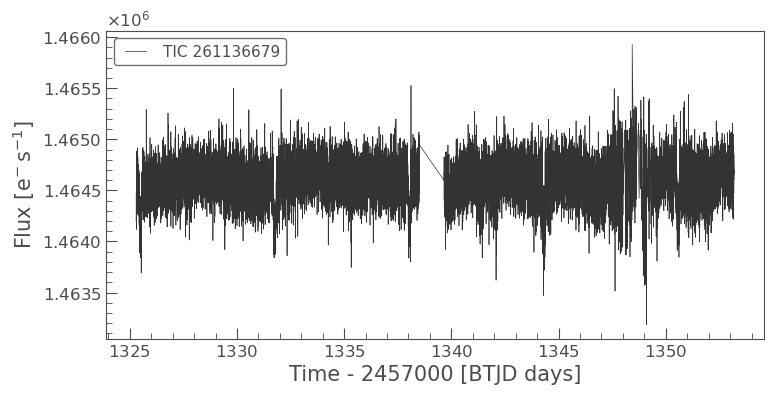

In [7]:
if lc_collection:
    lc0 = lc_collection[0]
    print(lc0)
    lc0.plot();
else:
    print(f"No light curves found for {target_star} with the specified criteria.")

The plot shows time on the x-axis and flux (usually `PDCSAP_FLUX` by default for `lk.LightCurve` objects from SPOC) on the y-axis. You can specify which flux column to plot:

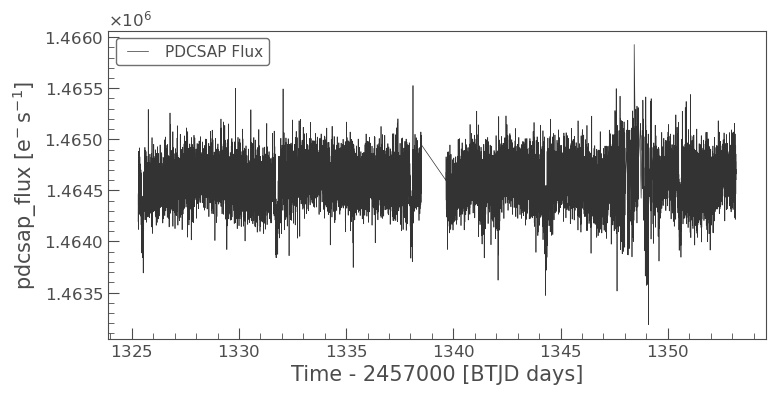

In [8]:
if lc_collection:
    # lc0.plot(column='sap_flux', label='SAP Flux')
    lc0.plot(column='pdcsap_flux', label='PDCSAP Flux');

## Working with Light Curve Files (LCFs)

A `LightCurve` object has several useful attributes and methods.
* `lc.time`: Time values (often in BJD - Barycentric Julian Date).
* `lc.flux`: Flux values.
* `lc.flux_err`: Errors on flux values.
* `lc.quality`: Quality flags indicating potential issues with data points.

### Stitching Multiple Sectors/Quarters
If your target was observed in multiple TESS sectors or Kepler quarters, `lc_collection.stitch()` can combine them. It's often a good idea to normalize each segment before stitching to handle brightness offsets between them.

Plotting first downloaded light curve (normalized and NaNs removed).


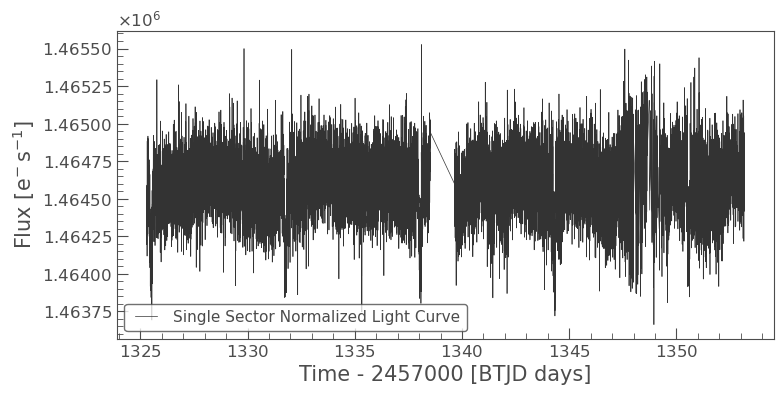

In [39]:
if len(lc_collection) > 1:
    # Stitching can sometimes introduce edge effects or fail if sectors are very different.
    # Normalizing each light curve before stitching helps with offsets.
    for i,lc_item in enumerate(lc_collection):
        lc_item = lc_item.remove_outliers()
        lc_item = lc_item.remove_nans()
        lc_collection[i] = lc_item
        try:
            stitched_lc = lc_collection.stitch()
        except TypeError:
            continue
elif lc_collection: # Only one sector/quarter
    stitched_lc = lc_collection[0].normalize().remove_nans()
else:
    print("No light curves to stitch.")

if 'stitched_lc' in locals() and stitched_lc is not None:
    stitched_lc.plot(label="Stitched & Normalized Light Curve");
elif lc_collection and lc_collection[0] is not None: # Fallback if stitching failed or only one LC
    print("Plotting first downloaded light curve (normalized and NaNs removed).")
    stitched_lc = lc_collection[0]# Ensure stitched_lc exists for next steps
    stitched_lc.plot(label="Single Sector Normalized Light Curve");

### Data Cleaning with Quality Flags
Space telescope data often have quality flags indicating issues like cosmic ray hits, spacecraft manoeuvres, or bad pixels. `lightkurve` attempts to handle standard quality masking when loading data (especially for `PDCSAP_FLUX` which often has NaNs where corrections failed).

We've already used `remove_nans()` which is crucial for `PDCSAP_FLUX`. Another common step is sigma clipping for remaining outliers.

Points before sigma clipping: 18257
Points after sigma clipping: 18257


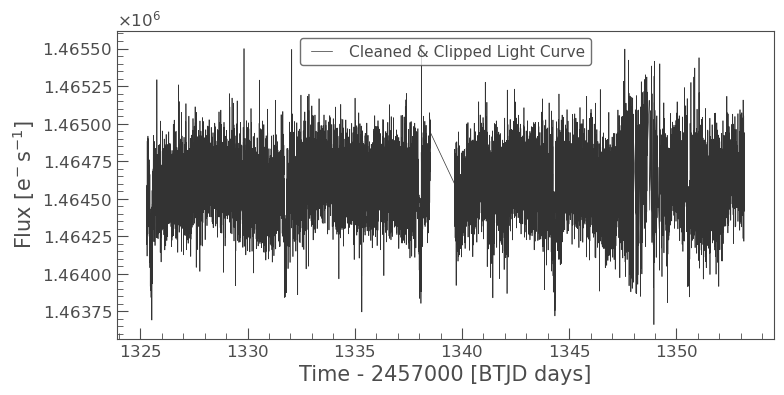

In [40]:
if 'stitched_lc' in locals() and stitched_lc is not None:
    # Remove outliers using sigma clipping
    # This removes points that are more than, e.g., 5 standard deviations from the median
    # It's often better to do this after some initial detrending if strong systematics are present.
    cleaned_lc = stitched_lc.remove_outliers(sigma=5)

    print(f"Points before sigma clipping: {len(stitched_lc.flux)}")
    print(f"Points after sigma clipping: {len(cleaned_lc.flux)}")

    cleaned_lc.plot(label="Cleaned & Clipped Light Curve");
else:
    print("Stitched light curve not available for cleaning.")

### Normalization and Detrending
**Normalization** typically means dividing the flux by its median (or mean) value, so the baseline flux is around 1.0. This is useful for comparing depths of transits or variability.
**Detrending** aims to remove instrumental systematics or stellar activity trends that are not of primary interest (e.g., if you're looking for transits, you might want to remove long-term stellar variability).

`lightkurve` offers several detrending methods. A common one is `flatten()`, which applies a Savitzky-Golay filter to remove low-frequency variations.

Error during flatten: 'MaskedQuantity' object with a scalar value is not iterable. The light curve might be too short or have issues.
Using the cleaned (but not flattened) light curve for subsequent steps.


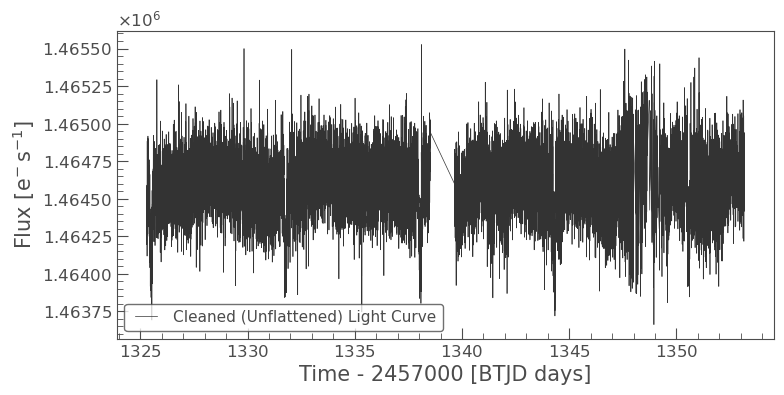

In [41]:
if 'cleaned_lc' in locals() and cleaned_lc is not None:
    # Our cleaned_lc is already normalized from the stitching step.
    # If you started with a raw light curve: normalized_lc = raw_lc.normalize()

    # Detrending with flatten
    # window_length should be chosen carefully: odd number, typically several times larger than the event of interest (e.g., transit duration)
    # but smaller than long-term trends you want to remove.
    # For TESS 2-minute cadence data of π Mensae c (P ~ 6.27 days, transit duration ~3.2 hours):
    # Transit duration in points: (3.2 hours * 60 min/hour) / 2 min/point = ~96 points.
    # A window_length of e.g. 5 * 96 + 1 = 481 (must be odd) might be a starting point.
    # This needs to be tuned based on the specific light curve and science goal.
    try:
        flat_lc = cleaned_lc.flatten(window_length=481, polyorder=3)
        flat_lc.plot(label="Flattened Light Curve");
    except Exception as e:
        print(f"Error during flatten: {e}. The light curve might be too short or have issues.")
        print("Using the cleaned (but not flattened) light curve for subsequent steps.")
        flat_lc = cleaned_lc # Fallback to unflattened if flatten fails
        flat_lc.plot(label="Cleaned (Unflattened) Light Curve");

else:
    print("Cleaned light curve not available for detrending.")

## Working with Target Pixel Files (TPFs) - Custom Photometry

If pre-processed light curves are not suitable (e.g., due to contamination from nearby stars, or if you want to experiment with different apertures), you can create your own light curve from TPF data.

First, download a TPF. Let's use the `search_tpf_result` from earlier and download one TPF for π Mensae.

In [42]:
# We'll select the first TPF from the TESS SPOC pipeline results
tpf_search_spoc = search_tpf_result[(search_tpf_result.author == "SPOC") & (search_tpf_result.mission == "TESS")]
if len(tpf_search_spoc) > 0:
    print(f"Found {len(tpf_search_spoc)} TPFs. Downloading the first one.")
    tpf = tpf_search_spoc[0].download()
    tpf.plot(frame=0); # Plot the first frame of the TPF
else:
    print(f"No TPFs found for {target_star} from TESS SPOC pipeline.")

No TPFs found for pi Men from TESS SPOC pipeline.


The plot shows the pixel data. The red outline is the default pipeline aperture. You can define your own aperture interactively (in a Jupyter Notebook session by enabling `tpf.interact()`) or by creating a boolean mask programmatically.

### Creating a Custom Aperture Mask
Let's try to define a simple circular aperture or use a threshold mask. For this example, we'll use the pipeline's default aperture, which is often a good choice.

In [43]:
if 'tpf' in locals() and tpf is not None:
    # Using the pipeline-defined aperture mask
    pipeline_aperture = tpf.pipeline_mask
    tpf.plot(aperture_mask=pipeline_aperture, mask_color='red');
    print(f"Pipeline aperture mask sum (pixels): {pipeline_aperture.sum()}")

    # To create a custom threshold mask (alternative):
    # custom_aperture = tpf.create_threshold_mask(threshold=5) # threshold in sigma above median
    # tpf.plot(aperture_mask=custom_aperture, mask_color='blue');
    # print(f"Custom threshold aperture mask sum (pixels): {custom_aperture.sum()}")
else:
    print("TPF not available for aperture definition.")

TPF not available for aperture definition.


### Performing Aperture Photometry
Once you have an aperture mask, you can extract the light curve using the `to_lightcurve()` method. This method will sum the flux within the aperture for each cadence.

In [ ]:
if 'tpf' in locals() and tpf is not None and 'pipeline_aperture' in locals() and pipeline_aperture.sum() > 0:
    custom_lc_from_tpf = tpf.to_lightcurve(aperture_mask=pipeline_aperture)
    custom_lc_from_tpf.plot(label="Light Curve from TPF (Pipeline Aperture)");
else:
    print("TPF or suitable aperture mask not available for custom photometry.")

This custom light curve is essentially a SAP (Simple Aperture Photometry) light curve. It will likely contain systematics from the instrument and spacecraft. You would then need to perform systematic correction (e.g., using `Regressors` in `lightkurve`, or methods like CBV, PLD if you delve deeper). For simplicity, we'll skip advanced custom systematic correction here and revert to using the PDCSAP flux from earlier (`flat_lc`) for the transit search example, as it has already undergone some systematic correction.

## Example: Finding a Transit

Let's take our flattened light curve (`flat_lc`) derived from the pre-processed PDCSAP data and see if we can spot the known transit of π Mensae c (Period ~6.27 days, Duration ~3.2 hours).

First, let's phase-fold the light curve.

In [ ]:
if 'flat_lc' in locals() and flat_lc is not None and len(flat_lc.remove_nans()) > 0:
    # Known parameters for pi Men c (from NASA Exoplanet Archive or literature)
    period_pi_men_c = 6.26835 # days
    t0_pi_men_c = 2458353.4626 # BJD, example epoch of transit center

    # Phase fold the light curve
    folded_lc = flat_lc.fold(period=period_pi_men_c, epoch_time=t0_pi_men_c)
    folded_lc.plot(label=f"Folded on P={period_pi_men_c:.4f} d");

    # To see the transit more clearly, you might want to bin the folded data
    binned_folded_lc = folded_lc.bin(time_bin_size=0.005) # Bin size in phase units (e.g., 0.005 is 1/200th of the period)
    binned_folded_lc.plot(label=f"Binned & Folded (P={period_pi_men_c:.4f} d)", marker='o', linestyle='none');
    plt.xlim(-0.05, 0.05) # Zoom in on the transit at phase 0
    # Pi Men c transit depth is ~550 ppm = 0.00055 in normalized flux
    # So, out-of-transit is 1.0, in-transit minimum is ~1.0 - 0.00055 = 0.99945
    plt.ylim(0.9990, 1.0010) # Adjust y-limits based on expected transit depth
    plt.title(f"Phase-folded light curve of {target_star}")
else:
    print("Flattened light curve not available or is empty for folding.")

This plot should show the characteristic dip of an exoplanet transit around phase 0, assuming the period, T0, and detrending were appropriate. The depth of π Men c is very small (~550 ppm or 0.055%), so it requires good quality data and careful processing. You might need to adjust `window_length` in `flatten` or try other detrending to see it clearly, or it may be more apparent in certain TESS sectors than others.

## Saving Your Reduced Light Curve

Once you have a processed light curve that you're happy with (e.g., `flat_lc` or `folded_lc`), you can save it to a file. Common formats include CSV or FITS.

**Note for Google Colab users:** Files saved this way will be stored in the temporary Colab environment. To save them permanently, you'll need to download them to your local machine or mount your Google Drive and save them there. You can find downloaded files in the file browser panel in Colab (usually on the left sidebar) and right-click to download.

In [ ]:
if 'flat_lc' in locals() and flat_lc is not None and len(flat_lc.remove_nans()) > 0:
    # Save the time-series (flattened) light curve as CSV
    # Using .to_pandas() to select specific columns and then .to_csv()
    output_filename_csv = f"{target_star.replace(' ', '_')}_flat_lightcurve.csv"
    flat_lc.to_csv(output_filename_csv, overwrite=True)
    print(f"Flattened light curve saved as: {output_filename_csv}")
    # Display the first few lines by reading it back (optional)
    # import pandas as pd
    # print(pd.read_csv(output_filename_csv).head())

    # Save as FITS (Lightkurve's default format includes more metadata)
    output_filename_fits = f"{target_star.replace(' ', '_')}_flat_lightcurve.fits"
    flat_lc.write(output_filename_fits, overwrite=True)
    print(f"Flattened light curve saved as: {output_filename_fits}")

    # If using Google Colab and want to trigger a download for the CSV:
    # from google.colab import files
    # files.download(output_filename_csv)
else:
    print("No processed light curve to save.")

## Conclusion and Further Steps

Congratulations! You've learned the basics of:
* Searching for data from space telescopes like TESS and Kepler using `lightkurve`.
* Understanding the difference between Light Curve Files (LCFs) and Target Pixel Files (TPFs).
* Downloading and plotting light curves.
* Performing essential data reduction steps: cleaning, normalization, and detrending.
* Extracting a custom light curve from TPF data (basic aperture photometry).
* Phase-folding a light curve to look for periodic signals like exoplanet transits.
* Saving your processed light curve, with considerations for online IDEs.

**Further Steps for Your Research:**
* **Advanced Detrending:** Explore more sophisticated detrending techniques (e.g., Gaussian Processes, Cotrending Basis Vectors - CBVs, Pixel Level Decorrelation - PLD) if simple methods are insufficient.
* **Period Finding:** If the period of a signal is unknown, use period-finding algorithms (e.g., Box Least Squares for transits, Lomb-Scargle periodogram for stellar oscillations) available in `lightkurve` or `astropy.timeseries`.
* **Transit Modeling:** If you find a transit, you can model its shape to determine planetary parameters (radius, inclination, etc.) using packages like `exoplanet`, `batman`, or `PyTransit`.
* **Systematics Mitigation:** Deep dive into understanding and mitigating instrumental systematics specific to the mission you are working with.
* **Consult Documentation:** The [Lightkurve documentation](https://docs.lightkurve.org) is an excellent resource with many tutorials and API references.